In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import glob
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os

In [3]:
!mkdir /content/drive/MyDrive/AKSARA/Bali_/

In [4]:
daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Bali/*')
ori = [_+"/"+_.split('/')[-1]+'.png' for _ in daftar_huruf]
for ah in ori:
  os.mkdir("/content/drive/MyDrive/AKSARA/Bali_/"+ah.split('/')[-1].split('.')[0])
  shutil.move(ah, "/content/drive/MyDrive/AKSARA/Bali_/"+ah.split('/')[-1].split('.')[0]+'/'+ah.split('/')[-1].split('.')[0]+'.png')

In [5]:
!rm -rf /content/drive/MyDrive/AKSARA/Bali/

In [6]:
!mv /content/drive/MyDrive/AKSARA/Bali_/ /content/drive/MyDrive/AKSARA/Bali/

In [7]:
daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Bali/*')
daftar_huruf_nama = [_+"/"+_.split('/')[-1]+".png" for _ in daftar_huruf]
daftar_huruf_kosong = []

for nama in daftar_huruf_nama:
  _ = cv2.imread(nama)
  print(nama.split('/')[-1], np.sum(255-_))

  if np.sum(255-_)==0:
    daftar_huruf_kosong.append(nama.split('/')[-1].split('.')[0])

BALINESE_DIGIT_EIGHT.png 9617178
BALINESE_ADEG_ADEG.png 8816028
BALINESE_CARIK_PAMUNGKAH.png 1346190
BALINESE_DIGIT_FOUR.png 4880952
BALINESE_DIGIT_NINE.png 13826781
BALINESE_DIGIT_SEVEN.png 15125853
BALINESE_DIGIT_ONE.png 16968552
BALINESE_CARIK_PAREREN.png 7959978
BALINESE_DIGIT_FIVE.png 16437294
BALINESE_CARIK_SIKI.png 4014996
BALINESE_LETTER_AIKARA.png 30613806
BALINESE_LETTER_AKARA.png 12915486
BALINESE_DIGIT_THREE.png 21969276
BALINESE_LETTER_ASYURA_SASAK.png 22512129
BALINESE_DIGIT_ZERO.png 6624045
BALINESE_DIGIT_SIX.png 7956669
BALINESE_DIGIT_TWO.png 21224643
BALINESE_LETTER_AKARA_TEDUNG.png 14506284
BALINESE_LETTER_BA.png 14925414
BALINESE_LETTER_BA_KEMBANG.png 10544463
BALINESE_LETTER_GA.png 13234323
BALINESE_LETTER_CA.png 12678744
BALINESE_LETTER_DA.png 12260025
BALINESE_LETTER_GA_GORA.png 17109054
BALINESE_LETTER_EF_SASAK.png 11078847
BALINESE_LETTER_CA_LACA.png 13292586
BALINESE_LETTER_DA_MURDA_MAHAPRANA.png 8550624
BALINESE_LETTER_DA_MURDA_ALPAPRANA.png 11113806
BALINESE_

In [8]:
def autoCrop(this_image):
    image_data_bw = this_image.max(axis=2)
    non_empty_columns = np.where(image_data_bw.min(axis=0)<0.2)[0]
    non_empty_rows = np.where(image_data_bw.min(axis=1)<0.2)[0]
    cropBox = (min(non_empty_rows), max(non_empty_rows), min(non_empty_columns), max(non_empty_columns))

    image_data_new = this_image[cropBox[0]:cropBox[1]+1, cropBox[2]:cropBox[3]+1 , :]
    
    return image_data_new

In [9]:
daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Bali/*')
daftar_huruf_nama = [_+"/"+_.split('/')[-1]+".png" for _ in daftar_huruf]
daftar_huruf_kosong = []

for nama in daftar_huruf_nama:
  _ = cv2.imread(nama)
  print(nama.split('/')[-1], np.sum(255-_))
  _ = autoCrop(_)
  cv2.imwrite(nama, _)

BALINESE_DIGIT_EIGHT.png 9617178
BALINESE_ADEG_ADEG.png 8816028
BALINESE_CARIK_PAMUNGKAH.png 1346190
BALINESE_DIGIT_FOUR.png 4880952
BALINESE_DIGIT_NINE.png 13826781
BALINESE_DIGIT_SEVEN.png 15125853
BALINESE_DIGIT_ONE.png 16968552
BALINESE_CARIK_PAREREN.png 7959978
BALINESE_DIGIT_FIVE.png 16437294
BALINESE_CARIK_SIKI.png 4014996
BALINESE_LETTER_AIKARA.png 30613806
BALINESE_LETTER_AKARA.png 12915486
BALINESE_DIGIT_THREE.png 21969276
BALINESE_LETTER_ASYURA_SASAK.png 22512129
BALINESE_DIGIT_ZERO.png 6624045
BALINESE_DIGIT_SIX.png 7956669
BALINESE_DIGIT_TWO.png 21224643
BALINESE_LETTER_AKARA_TEDUNG.png 14506284
BALINESE_LETTER_BA.png 14925414
BALINESE_LETTER_BA_KEMBANG.png 10544463
BALINESE_LETTER_GA.png 13234323
BALINESE_LETTER_CA.png 12678744
BALINESE_LETTER_DA.png 12260025
BALINESE_LETTER_GA_GORA.png 17109054
BALINESE_LETTER_EF_SASAK.png 11078847
BALINESE_LETTER_CA_LACA.png 13292586
BALINESE_LETTER_DA_MURDA_MAHAPRANA.png 8550624
BALINESE_LETTER_DA_MURDA_ALPAPRANA.png 11113806
BALINESE_

In [10]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import Augmentor

def perbanyak(ini, sebanyak_ini):
  p = Augmentor.Pipeline(source_directory=ini, output_directory='.')
  p.random_distortion(probability=1, grid_width=2, grid_height=2, magnitude=1)
  p.rotate(probability=0.7, max_left_rotation=6, max_right_rotation=6)
  p.zoom_random(probability=0.7, percentage_area=0.9)
  p.resize(probability=1, width=64, height=64)
  p.sample(sebanyak_ini)

In [12]:
bali = glob.glob("/content/drive/MyDrive/AKSARA/Bali/*")

for huruf in bali:
  perbanyak(huruf, 20)

Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_DIGIT_EIGHT/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F8F55760>: 100%|██████████| 20/20 [00:00<00:00, 38.78 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_ADEG_ADEG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F8FCC850>: 100%|██████████| 20/20 [00:00<00:00, 31.17 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_CARIK_PAMUNGKAH/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F8F55D90>: 100%|██████████| 20/20 [00:00<00:00, 54.02 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_DIGIT_FOUR/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F56F2C10>: 100%|██████████| 20/20 [00:00<00:00, 41.58 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_DIGIT_NINE/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F8F6D6A0>: 100%|██████████| 20/20 [00:00<00:00, 28.27 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_DIGIT_SEVEN/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F906FE20>: 100%|██████████| 20/20 [00:00<00:00, 25.39 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_DIGIT_ONE/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F8F6D190>: 100%|██████████| 20/20 [00:00<00:00, 25.87 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_CARIK_PAREREN/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F56F2490>: 100%|██████████| 20/20 [00:00<00:00, 36.77 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_DIGIT_FIVE/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F570ADF0>: 100%|██████████| 20/20 [00:00<00:00, 28.72 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_CARIK_SIKI/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5704040>: 100%|██████████| 20/20 [00:00<00:00, 48.74 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_AIKARA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F8F55280>: 100%|██████████| 20/20 [00:00<00:00, 26.17 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_AKARA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F57046D0>: 100%|██████████| 20/20 [00:00<00:00, 46.71 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_DIGIT_THREE/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5713F70>: 100%|██████████| 20/20 [00:00<00:00, 33.37 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_ASYURA_SASAK/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5704BB0>: 100%|██████████| 20/20 [00:00<00:00, 36.69 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_DIGIT_ZERO/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5720700>: 100%|██████████| 20/20 [00:00<00:00, 65.46 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_DIGIT_SIX/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5711A60>: 100%|██████████| 20/20 [00:00<00:00, 51.13 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_DIGIT_TWO/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5720A60>: 100%|██████████| 20/20 [00:00<00:00, 33.14 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_AKARA_TEDUNG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F571A850>: 100%|██████████| 20/20 [00:00<00:00, 44.24 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_BA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F906FF10>: 100%|██████████| 20/20 [00:00<00:00, 54.44 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_BA_KEMBANG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F57159A0>: 100%|██████████| 20/20 [00:00<00:00, 48.52 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_GA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5728970>: 100%|██████████| 20/20 [00:00<00:00, 50.48 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_CA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F8F55430>: 100%|██████████| 20/20 [00:00<00:00, 50.14 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_DA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F57216A0>: 100%|██████████| 20/20 [00:00<00:00, 44.35 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_GA_GORA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F8FDB0A0>: 100%|██████████| 20/20 [00:00<00:00, 41.30 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_EF_SASAK/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5728850>: 100%|██████████| 20/20 [00:00<00:00, 45.44 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_CA_LACA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F56B7E50>: 100%|██████████| 20/20 [00:00<00:00, 50.70 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_DA_MURDA_MAHAPRANA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F9035DF0>: 100%|██████████| 20/20 [00:00<00:00, 55.13 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_DA_MURDA_ALPAPRANA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F56BEE20>: 100%|██████████| 20/20 [00:00<00:00, 48.16 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_EKARA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F56C59A0>: 100%|██████████| 20/20 [00:00<00:00, 49.95 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_DA_MADU/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F571A100>: 100%|██████████| 20/20 [00:00<00:00, 49.97 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_KHOT_SASAK/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5715370>: 100%|██████████| 20/20 [00:00<00:00, 35.91 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_KA_MAHAPRANA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F56CA730>: 100%|██████████| 20/20 [00:00<00:00, 39.04 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_KAF_SASAK/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F8FDB0D0>: 100%|██████████| 20/20 [00:00<00:00, 37.06 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_HA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F56CD8B0>: 100%|██████████| 20/20 [00:00<00:00, 46.54 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_IKARA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5728760>: 100%|██████████| 20/20 [00:00<00:00, 34.78 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_KA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F56DDA00>: 100%|██████████| 20/20 [00:00<00:00, 44.20 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_LA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F57033A0>: 100%|██████████| 20/20 [00:00<00:00, 46.39 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_IKARA_TEDUNG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F56DDC10>: 100%|██████████| 20/20 [00:00<00:00, 26.44 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_JA_JERA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F56F2C70>: 100%|██████████| 20/20 [00:00<00:00, 25.64 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_JA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F56DD9D0>: 100%|██████████| 20/20 [00:00<00:00, 53.80 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_NA_RAMBAT/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F56D9F10>: 100%|██████████| 20/20 [00:00<00:00, 54.07 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_OKARA_TEDUNG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F56CA160>: 100%|██████████| 20/20 [00:00<00:00, 22.78 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_LA_LENGA_TEDUNG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F56E3070>: 100%|██████████| 20/20 [00:00<00:00, 26.73 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_NYA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5673BE0>: 100%|██████████| 20/20 [00:00<00:00, 43.11 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_NGA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F56E9100>: 100%|██████████| 20/20 [00:00<00:00, 44.25 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_MA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F8FDB0A0>: 100%|██████████| 20/20 [00:00<00:00, 47.74 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_NA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5677760>: 100%|██████████| 20/20 [00:00<00:00, 48.48 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_PA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5673E80>: 100%|██████████| 20/20 [00:00<00:00, 49.92 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_LA_LENGA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F56D9640>: 100%|██████████| 20/20 [00:00<00:00, 26.61 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_OKARA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F571A850>: 100%|██████████| 20/20 [00:00<00:00, 34.07 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_TA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5677880>: 100%|██████████| 20/20 [00:00<00:00, 50.88 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_RA_REPA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F56852B0>: 100%|██████████| 20/20 [00:00<00:00, 40.18 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_PA_KAPAL/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F56960D0>: 100%|██████████| 20/20 [00:00<00:00, 55.05 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_TA_MURDA_MAHAPRANA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5703F40>: 100%|██████████| 20/20 [00:00<00:00, 48.64 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_RA_REPA_TEDUNG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5685E80>: 100%|██████████| 20/20 [00:00<00:00, 26.87 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_TA_LATIK/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F56DD0D0>: 100%|██████████| 20/20 [00:00<00:00, 46.81 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_RA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F56981C0>: 100%|██████████| 20/20 [00:00<00:00, 50.89 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_SA_SAPA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F568D310>: 100%|██████████| 20/20 [00:00<00:00, 50.52 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_SA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5704DF0>: 100%|██████████| 20/20 [00:00<00:00, 46.85 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_SA_SAGA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F568D8E0>: 100%|██████████| 20/20 [00:00<00:00, 44.47 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_WA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5704FA0>: 100%|██████████| 20/20 [00:00<00:00, 51.14 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_UKARA_TEDUNG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5721D90>: 100%|██████████| 20/20 [00:00<00:00, 28.62 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_UKARA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F56ACEB0>: 100%|██████████| 20/20 [00:00<00:00, 36.53 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_YA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F56AC5E0>: 100%|██████████| 20/20 [00:00<00:00, 45.99 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_ZAL_SASAK/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F66F6BB0>: 100%|██████████| 20/20 [00:00<00:00, 41.55 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_TZIR_SASAK/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F66F6880>: 100%|██████████| 20/20 [00:00<00:00, 35.01 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_TA_TAWA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F66FBB50>: 100%|██████████| 20/20 [00:00<00:00, 43.52 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_LETTER_VE_SASAK/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5721D90>: 100%|██████████| 20/20 [00:00<00:00, 45.57 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_MUSICAL_SYMBOL_DAENG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F66F4FA0>: 100%|██████████| 20/20 [00:00<00:00, 62.44 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_MUSICAL_SYMBOL_DANG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F66F4B50>: 100%|██████████| 20/20 [00:00<00:00, 59.42 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_MUSICAL_SYMBOL_DAING/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F66F40A0>: 100%|██████████| 20/20 [00:00<00:00, 21.32 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_MUSICAL_SYMBOL_DENG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F6705100>: 100%|██████████| 20/20 [00:00<00:00, 42.42 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_MUSICAL_SYMBOL_DANG_SURANG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F670C4F0>: 100%|██████████| 20/20 [00:00<00:00, 57.30 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_MUSICAL_SYMBOL_DUNG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F67052B0>: 100%|██████████| 20/20 [00:00<00:00, 52.40 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_MUSICAL_SYMBOL_DANG_GEDE/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F671A5E0>: 100%|██████████| 20/20 [00:00<00:00, 34.14 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_MUSICAL_SYMBOL_DEUNG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F66F44C0>: 100%|██████████| 20/20 [00:00<00:00, 50.68 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_MUSICAL_SYMBOL_LEFT-HAND_CLOSED_PLAK/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F671A0D0>: 100%|██████████| 20/20 [00:00<00:00, 57.02 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_MUSICAL_SYMBOL_LEFT-HAND_CLOSED_PLUK/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F671A4C0>: 100%|██████████| 20/20 [00:00<00:00, 51.82 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_MUSICAL_SYMBOL_DONG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F671AB50>: 100%|██████████| 20/20 [00:00<00:00, 50.76 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_MUSICAL_SYMBOL_LEFT-HAND_OPEN_PANG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F66F64C0>: 100%|██████████| 20/20 [00:00<00:00, 50.89 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_MUSICAL_SYMBOL_DING/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F672CD30>: 100%|██████████| 20/20 [00:00<00:00, 61.36 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_PAMADA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F67215B0>: 100%|██████████| 20/20 [00:00<00:00, 20.14 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_MUSICAL_SYMBOL_LEFT-HAND_OPEN_PING/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F8F5F0D0>: 100%|██████████| 20/20 [00:00<00:00, 60.99 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_MUSICAL_SYMBOL_LEFT-HAND_OPEN_PUNG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F56F4BB0>: 100%|██████████| 20/20 [00:00<00:00, 41.18 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_MUSICAL_SYMBOL_RIGHT-HAND_CLOSED_TAK/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F571A850>: 100%|██████████| 20/20 [00:00<00:00, 42.42 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_MUSICAL_SYMBOL_RIGHT-HAND_OPEN_DAG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F6729220>: 100%|██████████| 20/20 [00:00<00:00, 46.55 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_PAMENENG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F56A6BE0>: 100%|██████████| 20/20 [00:00<00:00, 53.97 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_SIGN_BISAH/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5EBBB20>: 100%|██████████| 20/20 [00:00<00:00, 49.98 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_PANTI/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F6729D60>: 100%|██████████| 20/20 [00:00<00:00, 27.22 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_MUSICAL_SYMBOL_RIGHT-HAND_CLOSED_TUK/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5EBCFD0>: 100%|██████████| 20/20 [00:00<00:00, 43.23 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_MUSICAL_SYMBOL_RIGHT-HAND_OPEN_DUG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5EBB190>: 100%|██████████| 20/20 [00:00<00:00, 47.79 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_VOWEL_SIGN_PEPET_TEDUNG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F571A850>: 100%|██████████| 20/20 [00:00<00:00, 51.26 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_VOWEL_SIGN_LA_LENGA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F8F552E0>: 100%|██████████| 20/20 [00:00<00:00, 64.55 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_VOWEL_SIGN_RA_REPA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5EBBA00>: 100%|██████████| 20/20 [00:00<00:00, 55.83 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_VOWEL_SIGN_LA_LENGA_TEDUNG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5EC63D0>: 100%|██████████| 20/20 [00:00<00:00, 39.43 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_VOWEL_SIGN_TALING_REPA_TEDUNG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5ED5C40>: 100%|██████████| 20/20 [00:01<00:00, 17.87 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_VOWEL_SIGN_TEDUNG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F66F6E20>: 100%|██████████| 20/20 [00:00<00:00, 53.49 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_VOWEL_SIGN_TALING_REPA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5ED5850>: 100%|██████████| 20/20 [00:00<00:00, 36.38 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_VOWEL_SIGN_TALING_TEDUNG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5ED0D60>: 100%|██████████| 20/20 [00:00<00:00, 22.00 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_VOWEL_SIGN_RA_REPA_TEDUNG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5ECEF10>: 100%|██████████| 20/20 [00:00<00:00, 36.29 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_VOWEL_SIGN_TALING/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F8F5F0D0>: 100%|██████████| 20/20 [00:00<00:00, 36.91 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bali/BALINESE_WINDU/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7FB5F5EDEA90>: 100%|██████████| 20/20 [00:00<00:00, 60.41 Samples/s]


In [ ]:
'''import shutil

for i in daftar_huruf_kosong:
  shutil.rmtree('/content/drive/MyDrive/AKSARA/Bali/' + i)''' 

In [13]:
x = []
y = []

daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Bali/*')

for c, jenis_huruf in enumerate(daftar_huruf):
  list_huruf = glob.glob(jenis_huruf + '/*')
  for huruf in list_huruf:
    try:
      aksara = cv2.imread(huruf)
      aksara = aksara/255
      #aksara = autoCrop(aksara)
      if aksara.shape[0] == 0 or aksara.shape[1] == 1:
        continue
      else:
        aksara = cv2.resize(aksara, (64, 64))
        x.append(aksara)
        y.append(c)
    except:
      continue

In [14]:
len(x)

2142

In [15]:
len(set(y))

102

In [16]:
2142/102

21.0

In [17]:
z = list(zip(x,y))
random.shuffle(z)
x, y = zip(*z)
x = np.asarray(x).astype(float)
y = np.asarray(y)

In [ ]:
y.shape

(2142,)

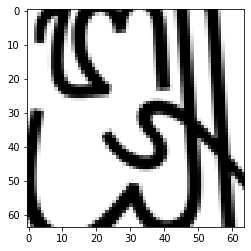

In [18]:
plt.imshow(x[2])

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import accuracy, categorical_accuracy

model = Sequential()

model.add(Conv2D(2, (3, 3), input_shape = x.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(4, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(units = 102, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x, y, batch_size = 2, epochs = 20, validation_split = 0.2)

Epoch 1/20
845/845 [==============================] - 10s 11ms/step - loss: 2.8081 - accuracy: 0.4024 - val_loss: 1.0458 - val_accuracy: 0.6974
Epoch 2/20
845/845 [==============================] - 11s 13ms/step - loss: 0.7316 - accuracy: 0.7876 - val_loss: 0.7861 - val_accuracy: 0.7636
Epoch 3/20
845/845 [==============================] - 9s 11ms/step - loss: 0.4470 - accuracy: 0.8491 - val_loss: 0.6808 - val_accuracy: 0.7825
Epoch 4/20
845/845 [==============================] - 8s 10ms/step - loss: 0.3172 - accuracy: 0.8923 - val_loss: 0.6524 - val_accuracy: 0.8109
Epoch 5/20
845/845 [==============================] - 9s 11ms/step - loss: 0.2709 - accuracy: 0.8982 - val_loss: 0.6519 - val_accuracy: 0.8085
Epoch 6/20
845/845 [==============================] - 9s 10ms/step - loss: 0.2159 - accuracy: 0.9189 - val_loss: 0.6715 - val_accuracy: 0.8061
Epoch 7/20
845/845 [==============================] - 10s 11ms/step - loss: 0.1968 - accuracy: 0.9213 - val_loss: 0.6553 - val_accuracy: 0.8

In [20]:
print("->", 0)
history = model.fit(x, y, batch_size=2, epochs=2, validation_split=0.1)

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

for i in range(1, 20):
  z = list(zip(x,y))
  random.shuffle(z)
  del x, y
  x, y = zip(*z)
  x = np.asarray(x).astype(float)
  y = np.asarray(y)
  del z

  print("->", i)
  history = model.fit(x, y, batch_size=2, epochs=2, validation_split=0.1)
  
  accuracy = np.concatenate((accuracy, history.history['accuracy']), axis=0)
  val_accuracy = np.concatenate((val_accuracy, history.history['val_accuracy']), axis=0)
  loss = np.concatenate((loss, history.history['loss']), axis=0)
  val_loss = np.concatenate((val_loss, history.history['val_loss']), axis=0)

-> 0
Epoch 1/2
964/964 [==============================] - 9s 8ms/step - loss: 2.0300 - accuracy: 0.5324 - val_loss: 0.3847 - val_accuracy: 0.8744
Epoch 2/2
964/964 [==============================] - 12s 13ms/step - loss: 0.3310 - accuracy: 0.8697 - val_loss: 0.3108 - val_accuracy: 0.8744
-> 1
Epoch 1/2
964/964 [==============================] - 14s 15ms/step - loss: 0.2528 - accuracy: 0.8921 - val_loss: 0.2485 - val_accuracy: 0.9116
Epoch 2/2
964/964 [==============================] - 8s 9ms/step - loss: 0.2071 - accuracy: 0.9144 - val_loss: 0.2592 - val_accuracy: 0.8977
-> 2
Epoch 1/2
964/964 [==============================] - 8s 8ms/step - loss: 0.1892 - accuracy: 0.9149 - val_loss: 0.2261 - val_accuracy: 0.8977
Epoch 2/2
964/964 [==============================] - 8s 8ms/step - loss: 0.1703 - accuracy: 0.9242 - val_loss: 0.2160 - val_accuracy: 0.8884
-> 3
Epoch 1/2
964/964 [==============================] - 9s 9ms/step - loss: 0.1635 - accuracy: 0.9315 - val_loss: 0.2022 - val_accura

In [25]:
model.save_weights("Model_Bali_FIX.h5")

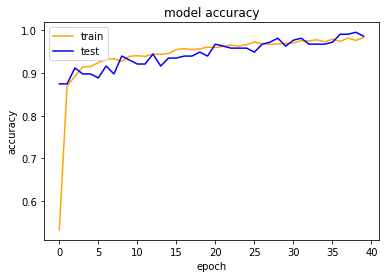

In [21]:
plt.plot(accuracy, 'orange', val_accuracy, 'blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

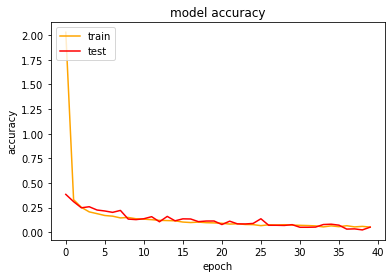

In [22]:
plt.plot(loss, 'orange', val_loss, 'red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(x[-1000:])
y_pred = np.argmax(y_pred, axis=1)

print(accuracy_score(y_pred, y[-1000:]))
cm = confusion_matrix(y_pred, y[-1000:])
print(cm)

print(classification_report(y_pred, y[-1000:]))

32/32 [==============================] - 1s 27ms/step
0.989
[[ 9  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ... 12  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        12
          12       0.92      1.00      0.96        11
          13       1.00    

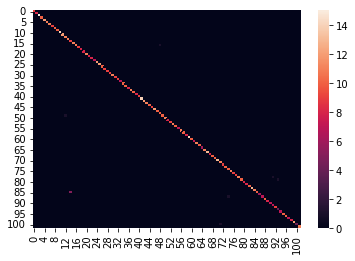

In [24]:
import seaborn as sns

sns.heatmap(cm)